In [8]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
import pandas_datareader as pdr
import matplotlib.pyplot as plt

import pandas_datareader.data as web 
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)


In [2]:
NYC_Jobs = pd.read_csv('NYC_Jobs.csv')
NYC_Jobs.drop(columns=['Job Description',"Minimum Qual Requirements","Preferred Skills","To Apply","Residency Requirement",'Additional Information',"Posting Updated", "Process Date",'Recruitment Contact',	'Post Until'], inplace=True)
NYC_Jobs['Posting Date'] = pd.to_datetime(NYC_Jobs['Posting Date'])
NYC_Jobs.set_index('Posting Date', inplace=True)

In [3]:
NYC_Jobsmean = NYC_Jobs.mean()
NYC_Jobs.fillna(NYC_Jobsmean, inplace=True)
NYC_Jobs.fillna('Unknown', inplace=True)

C:\Users\JBarr\AppData\Local\Temp\ipykernel_11872\852360385.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  NYC_Jobsmean = NYC_Jobs.mean()


In [4]:
NYC_Jobs.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Hours/Shift,Work Location 1
Posting Date,,,,,,,,,,,,,,,,,,,
2023-03-23,576483,DEPT OF YOUTH & COMM DEV SRVS,External,1,Senior Housing Coordinator,COMMUNITY COORDINATOR,Non-Competitive-5,56058,00,Constituent Services & Community Programs,F,Entry-Level,54100.0,83981.0,Annual,"2 Lafayette St., N.Y.",Vulnerable Youth &At-riskYout,35 Hours per a week,Unknown
2022-06-17,490582,HRA/DEPT OF SOCIAL SERVICES,Internal,3,NETWORK SECURITY ENGINEER,CERTIFIED IT ADMINISTRATOR (LA,Competitive-1,13652,03,"Administration & Human Resources Communications & Intergovernmental Affairs Technology, Data & Innovation Policy, Research & Analysis Public Safety, Inspections, & Enforcement Social Services",F,Experienced (non-manager),92194.0,130372.0,Annual,155 West Broadway New York N Y,DSS ACCOUNTABILITY OFFICE NM,Monday to Friday: 9 am to 5 pm.,Unknown
2022-12-20,565700,HRA/DEPT OF SOCIAL SERVICES,External,1,CHIEF OF STAFF,ADMINISTRATIVE STAFF ANALYST (,Competitive-1,1002D,00,Communications & Intergovernmental Affairs,F,Experienced (non-manager),94715.0,105000.0,Annual,253 Broadway New York Ny,Off Of Supp Accountability-NM,Normal Business Schedule,"253 Broadway New York Ny, NY 10007"
2022-12-02,563508,DEPARTMENT OF CITY PLANNING,External,1,RECEPTIONIST,CLERICAL ASSOCIATE,Competitive-1,10251,03,Administration & Human Resources,F,Entry-Level,36390.0,58953.0,Annual,"120 Broadway, New York, NY",Operations,Unknown,Unknown
2023-01-05,556371,DEPT OF HEALTH/MENTAL HYGIENE,Internal,1,"Site Supervisor, Bureau of Equitable Health Systems",ADMIN COMMUNITY RELATIONS SPEC,Competitive-1,1002F,00,Constituent Services & Community Programs Health,F,Experienced (non-manager),64749.0,75302.0,Annual,"1601 Ave. S, Brooklyn",CHECW - HEALTH INSURANCE,Unknown,Unknown


In [5]:
NYC_Jobs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6576 entries, 2023-03-23 to 2022-06-09
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         6576 non-null   int64  
 1   Agency                         6576 non-null   object 
 2   Posting Type                   6576 non-null   object 
 3   # Of Positions                 6576 non-null   int64  
 4   Business Title                 6576 non-null   object 
 5   Civil Service Title            6576 non-null   object 
 6   Title Classification           6576 non-null   object 
 7   Title Code No                  6576 non-null   object 
 8   Level                          6576 non-null   object 
 9   Job Category                   6576 non-null   object 
 10  Full-Time/Part-Time indicator  6576 non-null   object 
 11  Career Level                   6576 non-null   object 
 12  Salary Range From             

In [6]:
NYC_Jobs["Remote"] = NYC_Jobs["Work Location"].apply(lambda x: "Remote" if "remote" in str(x).lower() else "Non-Remote")

data_before_covid = NYC_Jobs[NYC_Jobs.index.year < 2020]
data_during_covid = NYC_Jobs[NYC_Jobs.index.year == 2020]
data_after_covid = NYC_Jobs[NYC_Jobs.index.year > 2020]



In [20]:
before_covid_counts = data_before_covid.groupby("Job Category").size().sort_values(ascending=False)
during_covid_counts = data_during_covid.groupby("Job Category").size().sort_values(ascending=False)
after_covid_counts = data_after_covid.groupby("Job Category").size().sort_values(ascending=False)

top_categories_before_covid = before_covid_counts.head(25)
top_categories_during_covid = during_covid_counts.head(25)
top_categories_after_covid = after_covid_counts.head(25)

print("Top 25 Job Categories with the highest number of job listings before COVID:")
print(top_categories_before_covid)
print("-----"*25)
print("Top 25 Job Categories with the highest number of job listings during COVID:")
print(top_categories_during_covid)
print("-----"*25)

print("Top 25 Job Categories with the highest number of job listings after COVID:")
print(top_categories_after_covid)


Top 25 Job Categories with the highest number of job listings before COVID:
Job Category
Health                                                                                              24
Technology, Data & Innovation                                                                       13
Administration & Human Resources                                                                    11
Information Technology & Telecommunications                                                         10
Finance, Accounting, & Procurement                                                                   8
Clerical & Administrative Support                                                                    7
Legal Affairs                                                                                        6
Social Services                                                                                      5
Public Safety, Inspections, & Enforcement                                              

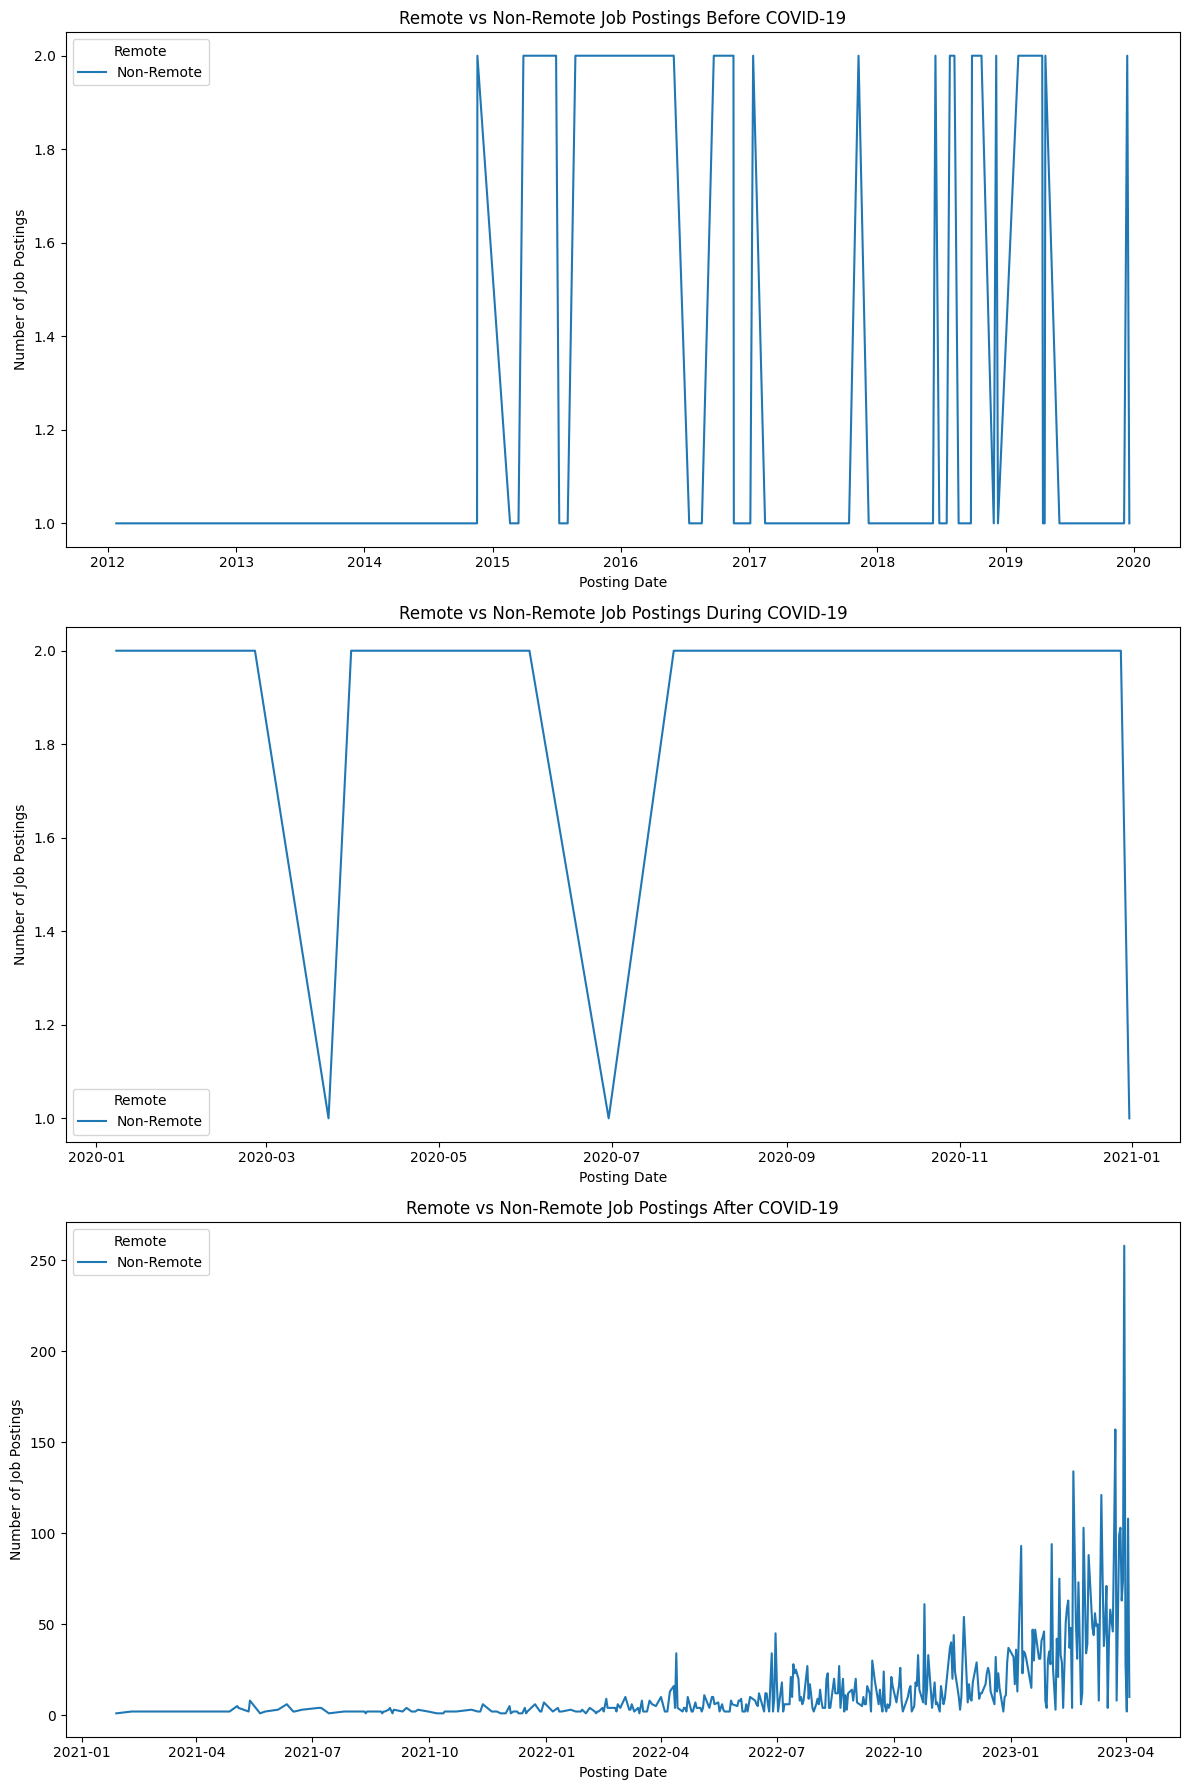

In [21]:

data_before_covid_grouped = data_before_covid.groupby([data_before_covid.index.date, "Remote"]).size().unstack(fill_value=0)
data_during_covid_grouped = data_during_covid.groupby([data_during_covid.index.date, "Remote"]).size().unstack(fill_value=0)
data_after_covid_grouped = data_after_covid.groupby([data_after_covid.index.date, "Remote"]).size().unstack(fill_value=0)

fig, axes = plt.subplots(nrows=3, figsize=(12, 18))
data_before_covid_grouped.plot(ax=axes[0], title="Remote vs Non-Remote Job Postings Before COVID-19", xlabel="Posting Date", ylabel="Number of Job Postings")
data_during_covid_grouped.plot(ax=axes[1], title="Remote vs Non-Remote Job Postings During COVID-19", xlabel="Posting Date", ylabel="Number of Job Postings")
data_after_covid_grouped.plot(ax=axes[2], title="Remote vs Non-Remote Job Postings After COVID-19", xlabel="Posting Date", ylabel="Number of Job Postings")
plt.tight_layout()
plt.show()

C:\Users\JBarr\AppData\Local\Temp\ipykernel_11872\296924355.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_before_covid_grouped = data_before_covid.groupby("Job Category").sum()["# Of Positions"].nlargest(10)
C:\Users\JBarr\AppData\Local\Temp\ipykernel_11872\296924355.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_during_covid_grouped = data_during_covid.groupby("Job Category").sum()["# Of Positions"].nlargest(10)
C:\Users\JBarr\AppData\Local\Temp\ipykernel_11872\296924355.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, num

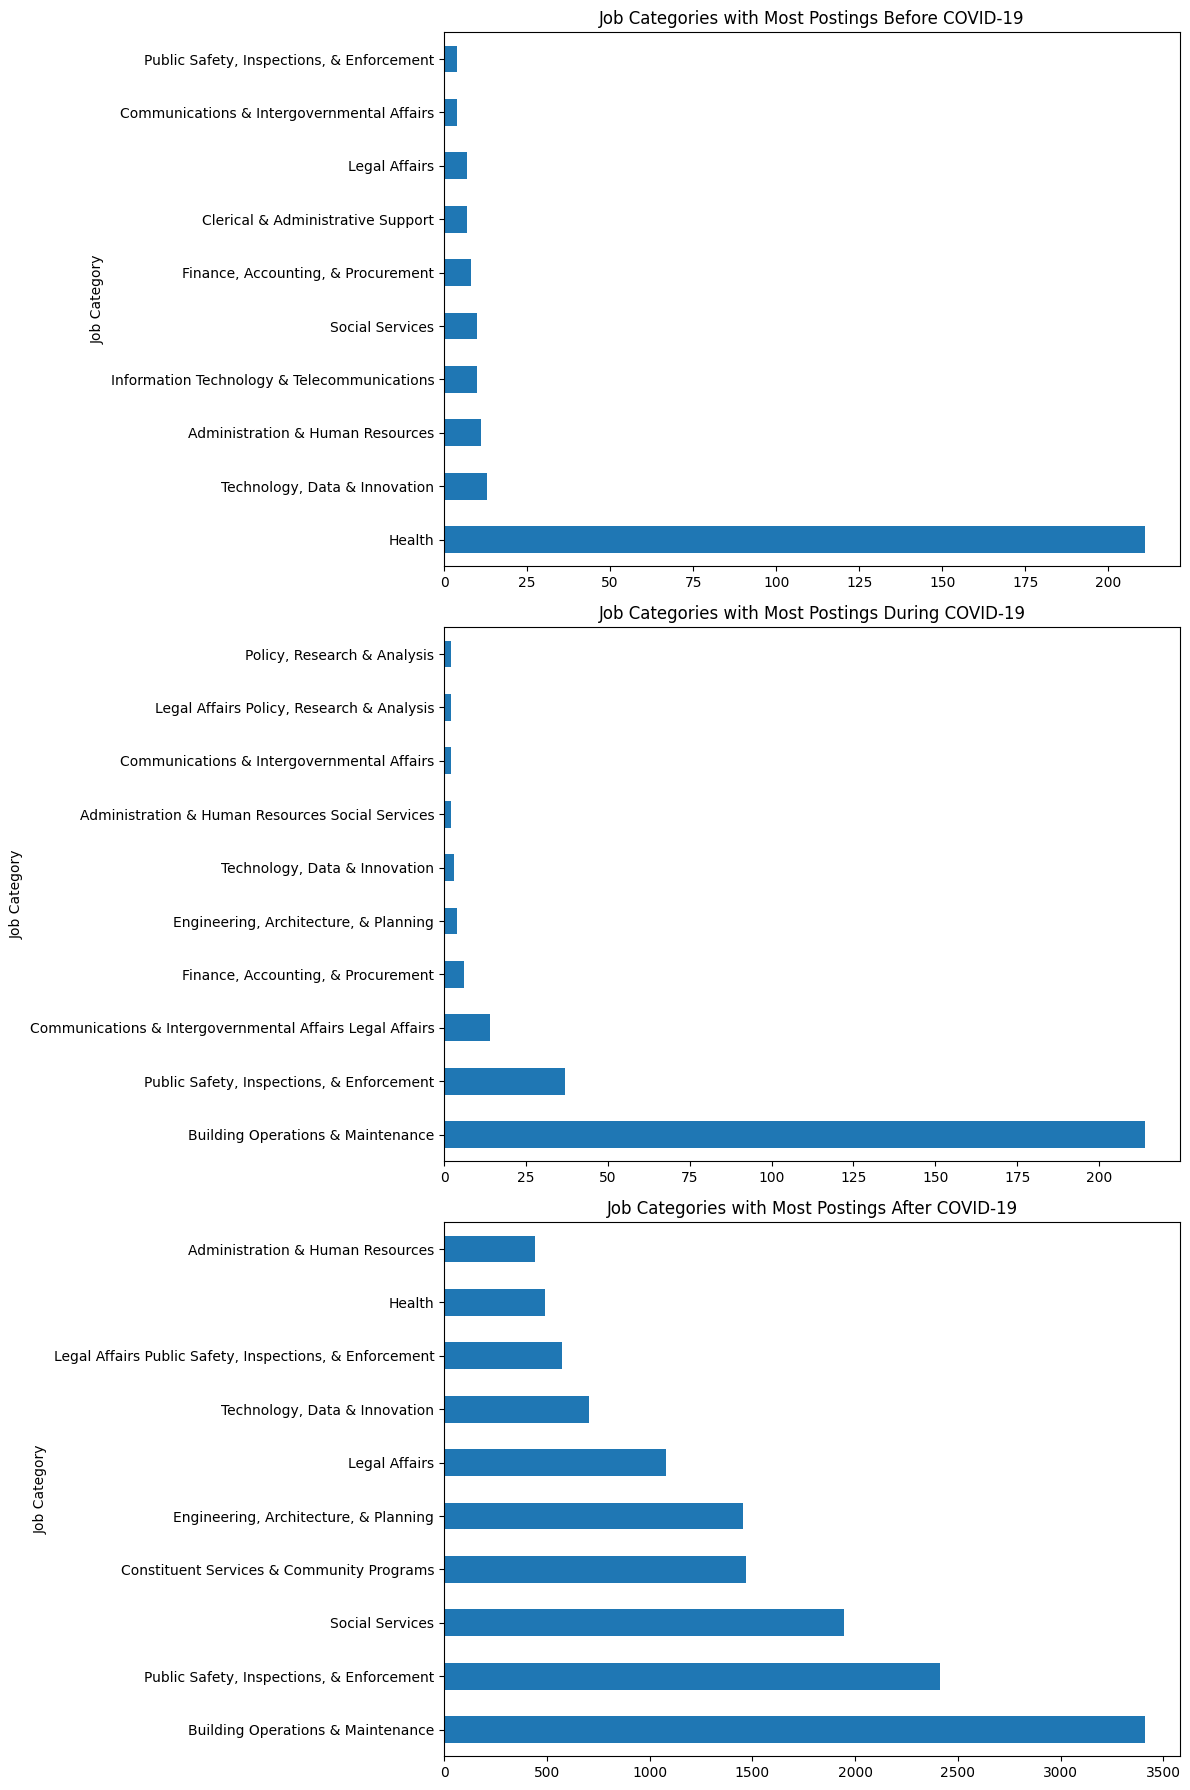

In [22]:
data_before_covid_grouped = data_before_covid.groupby("Job Category").sum()["# Of Positions"].nlargest(10)
data_during_covid_grouped = data_during_covid.groupby("Job Category").sum()["# Of Positions"].nlargest(10)
data_after_covid_grouped = data_after_covid.groupby("Job Category").sum()["# Of Positions"].nlargest(10)

fig, axes = plt.subplots(nrows=3, figsize=(12, 18))
data_before_covid_grouped.plot.barh(ax=axes[0], title="Job Categories with Most Postings Before COVID-19")
data_during_covid_grouped.plot.barh(ax=axes[1], title="Job Categories with Most Postings During COVID-19")
data_after_covid_grouped.plot.barh(ax=axes[2], title="Job Categories with Most Postings After COVID-19")
plt.tight_layout()
plt.show()


C:\Users\JBarr\AppData\Local\Temp\ipykernel_11872\2438202892.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


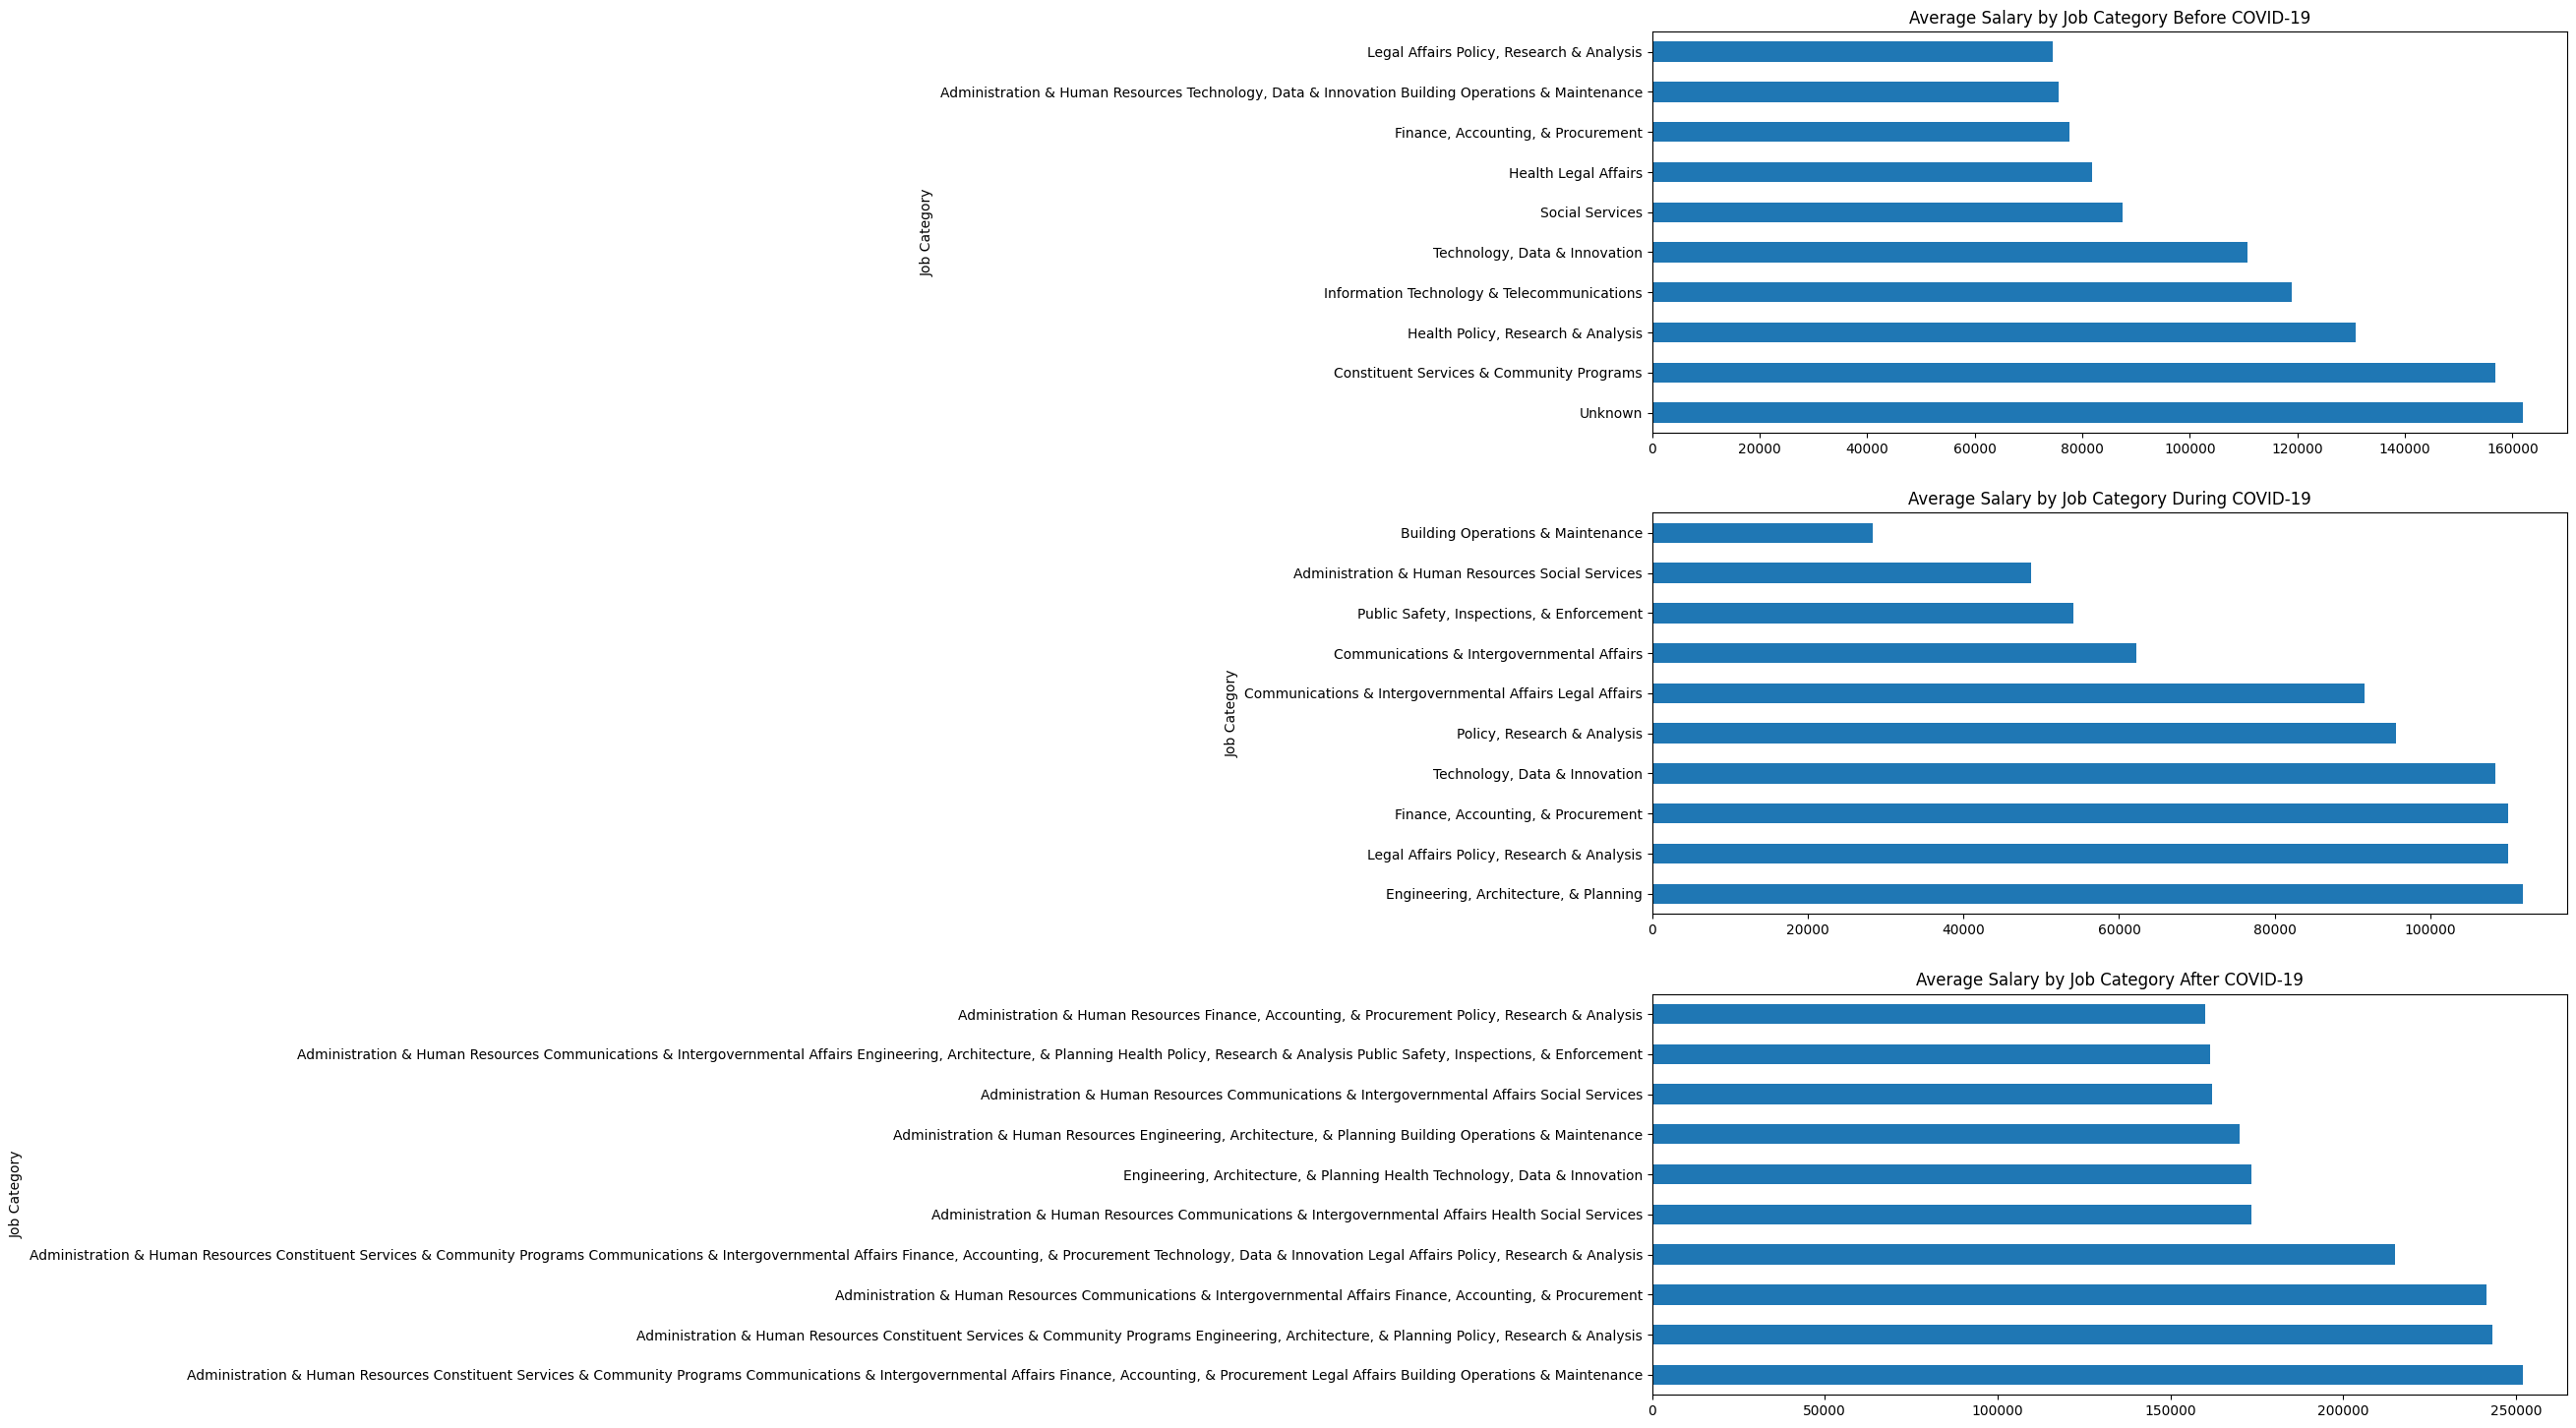

In [23]:
data_before_covid_salary = data_before_covid.groupby("Job Category")["Salary Range To"].mean().nlargest(10)
data_during_covid_salary = data_during_covid.groupby("Job Category")["Salary Range To"].mean().nlargest(10)
data_after_covid_salary = data_after_covid.groupby("Job Category")["Salary Range To"].mean().nlargest(10)

fig, axes = plt.subplots(nrows=3, figsize=(12, 18))

data_before_covid_salary.plot.barh(ax=axes[0], title="Average Salary by Job Category Before COVID-19")
data_during_covid_salary.plot.barh(ax=axes[1], title="Average Salary by Job Category During COVID-19")
data_after_covid_salary.plot.barh(ax=axes[2], title="Average Salary by Job Category After COVID-19")

plt.tight_layout()
plt.show()

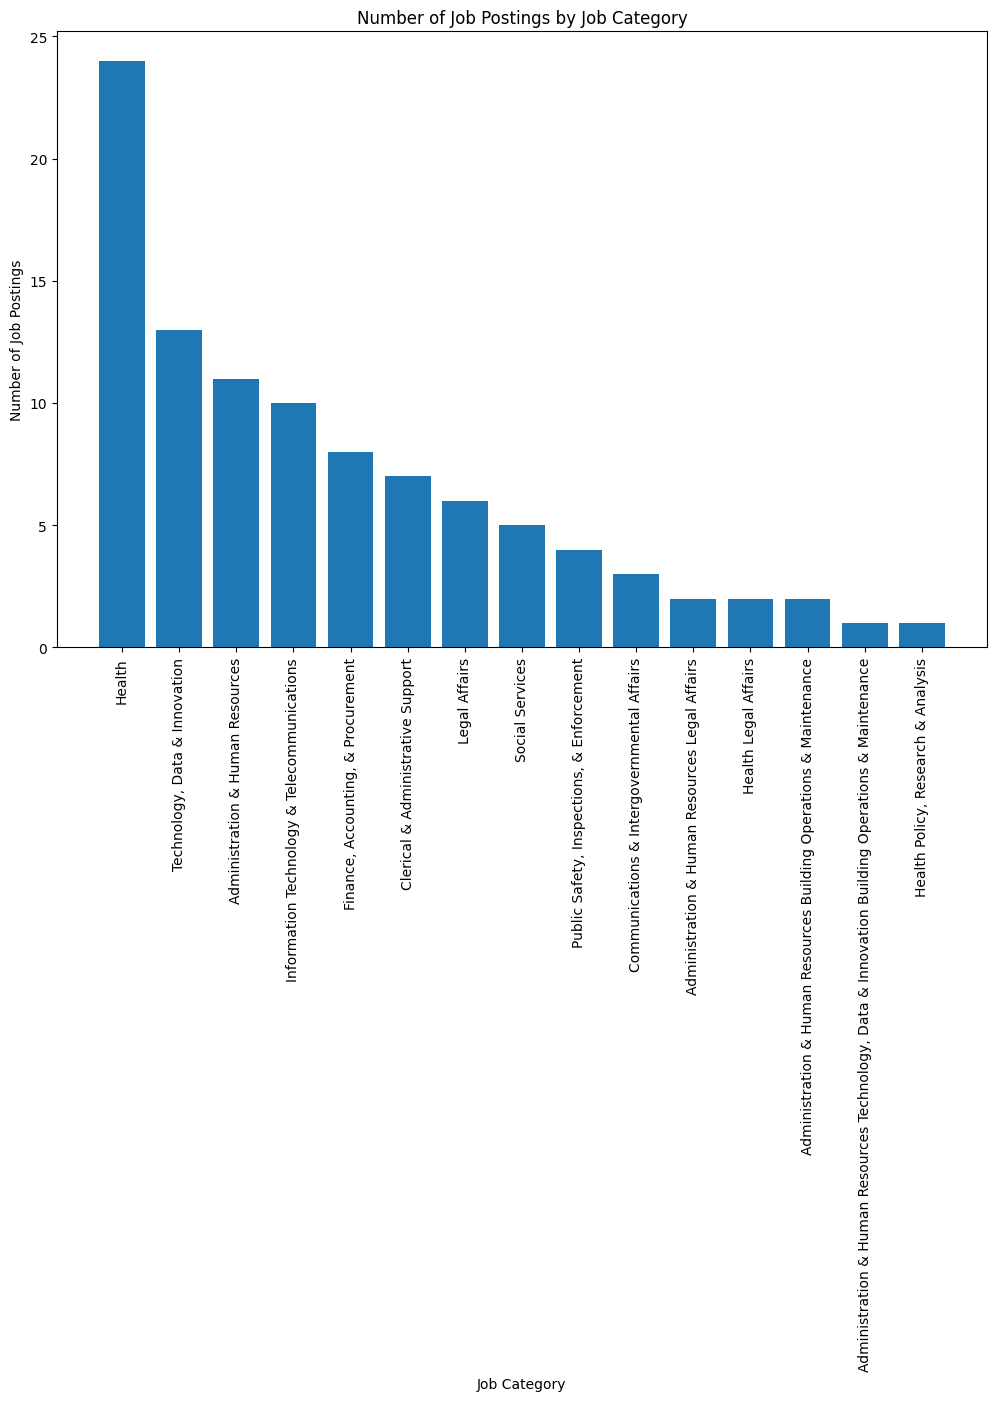

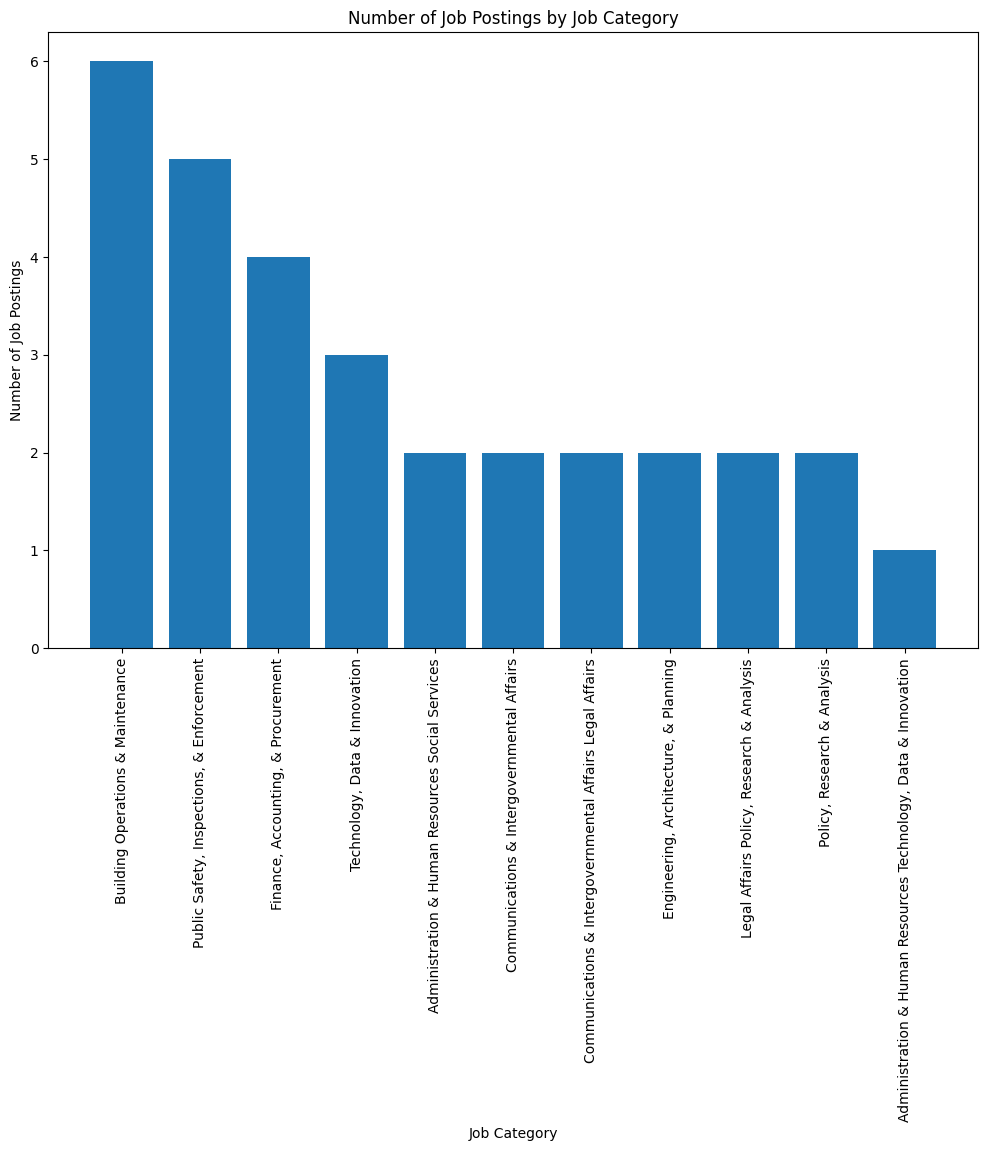

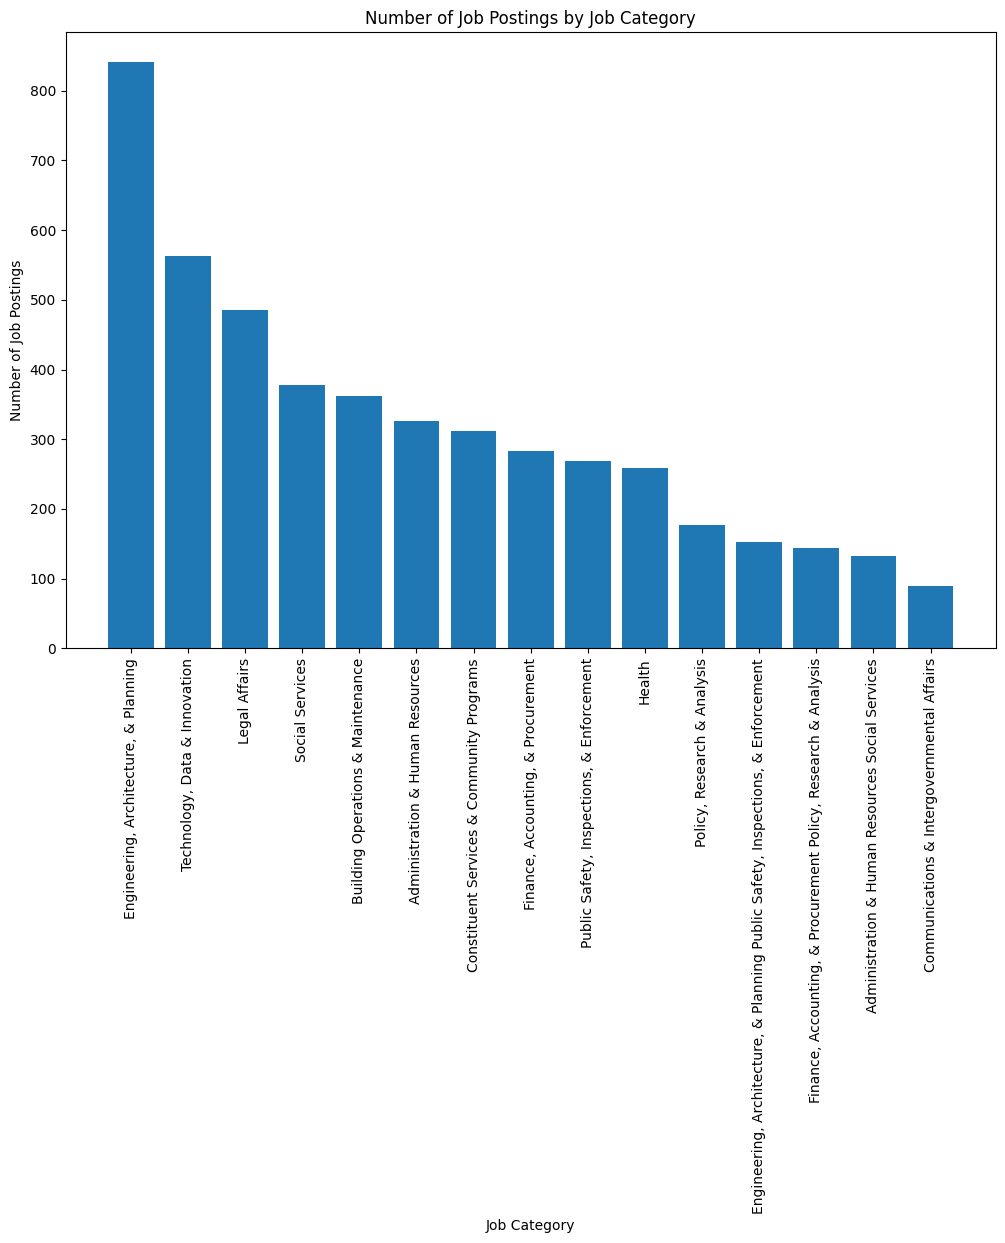

In [33]:

import matplotlib.pyplot as plt
data = [data_before_covid, data_during_covid, data_after_covid]
for df in data:
    job_category_counts = df.groupby('Job Category')['Job ID'].count().sort_values(ascending=False).nlargest(15)
    plt.figure(figsize=(12,8))
    plt.bar(job_category_counts.index, job_category_counts.values)
    plt.xticks(rotation=90)
    plt.xlabel('Job Category')
    plt.ylabel('Number of Job Postings')
    plt.title('Number of Job Postings by Job Category')
    plt.show()


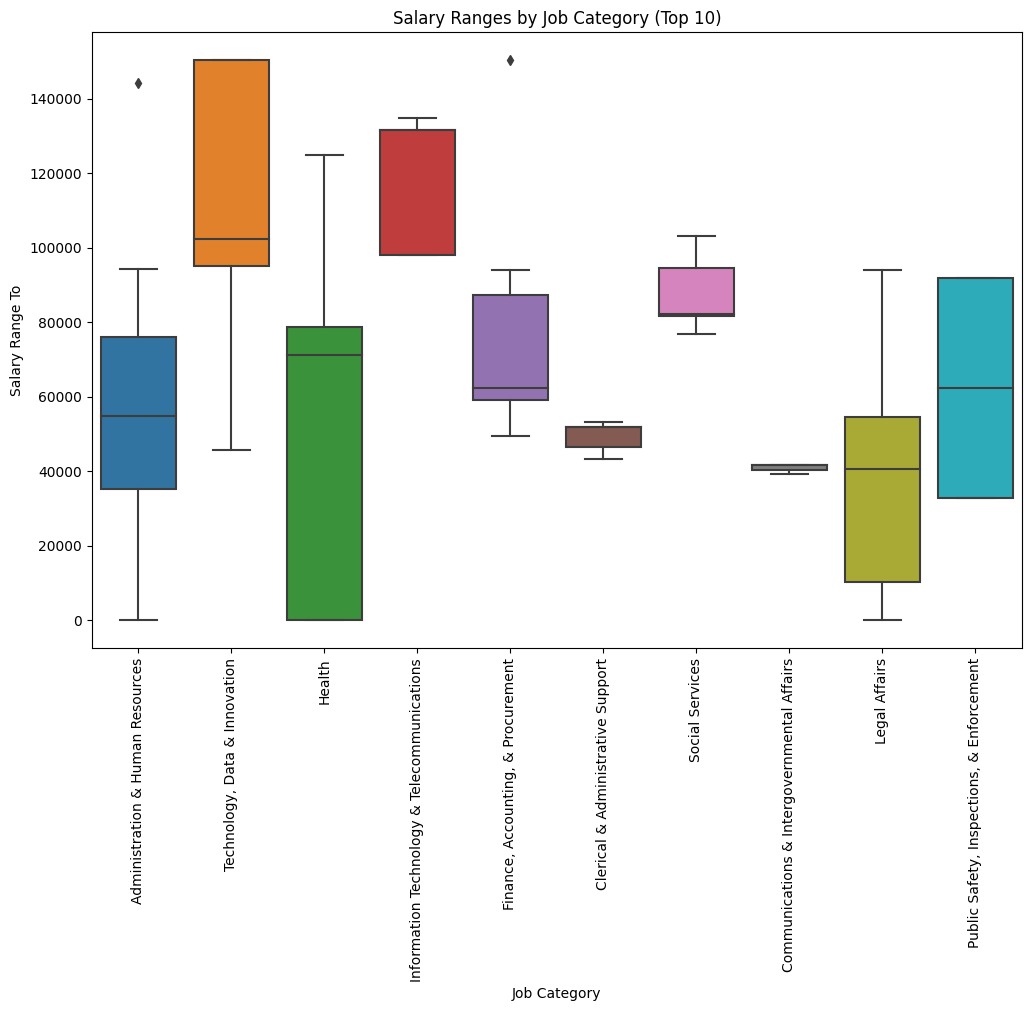

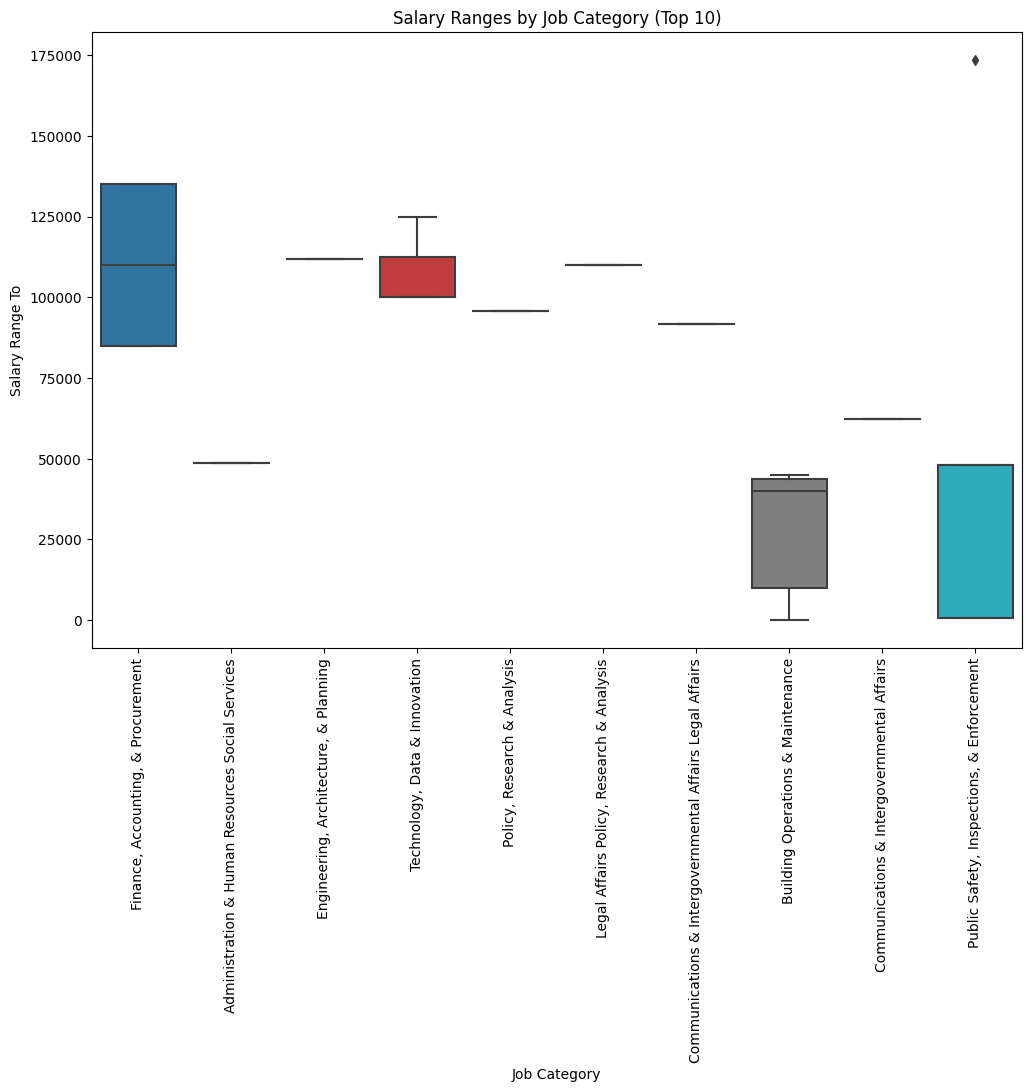

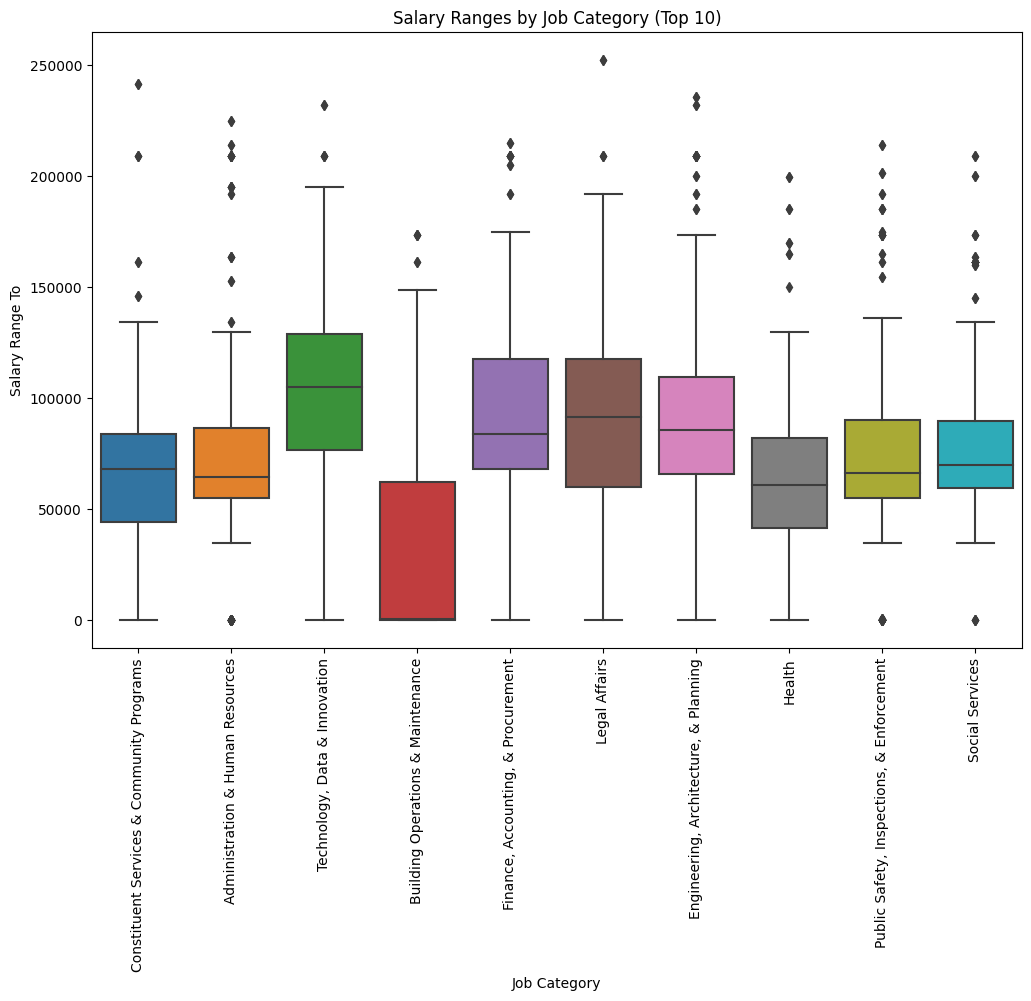

In [38]:
for df in data:
    top_job_categories = df.groupby('Job Category')['Job ID'].count().sort_values(ascending=False)[:10].index

    # Create the box plot for the top job categories only
    plt.figure(figsize=(12,8))
    sns.boxplot(x='Job Category', y='Salary Range To', data=df[df['Job Category'].isin(top_job_categories)])
    plt.xticks(rotation=90)
    plt.xlabel('Job Category')
    plt.ylabel('Salary Range To')
    plt.title('Salary Ranges by Job Category (Top 10)')
    plt.show()

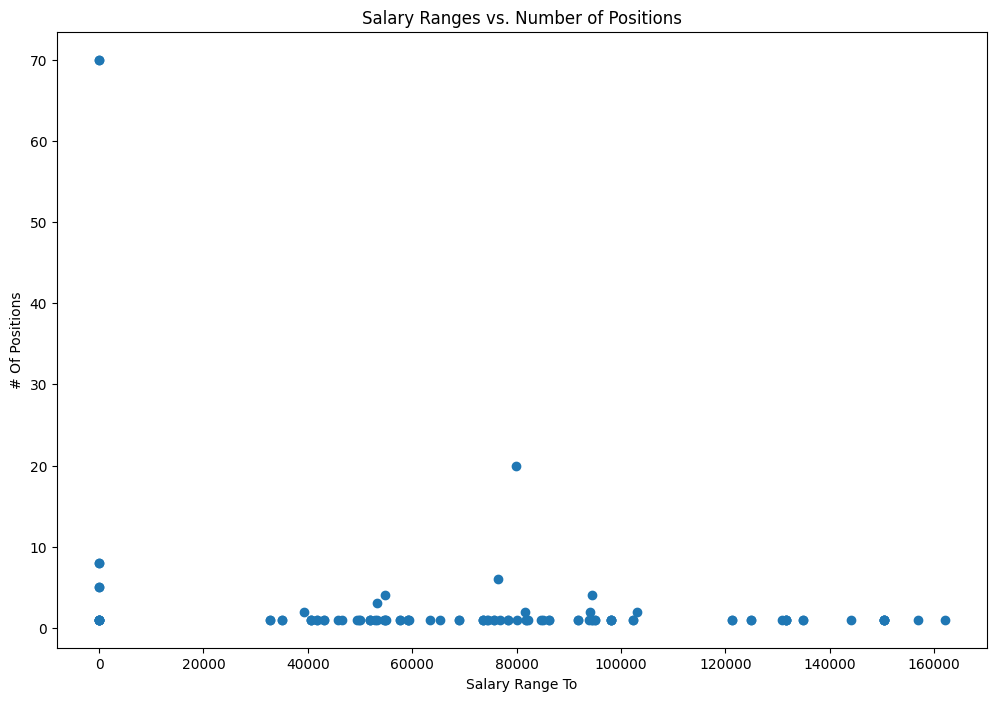

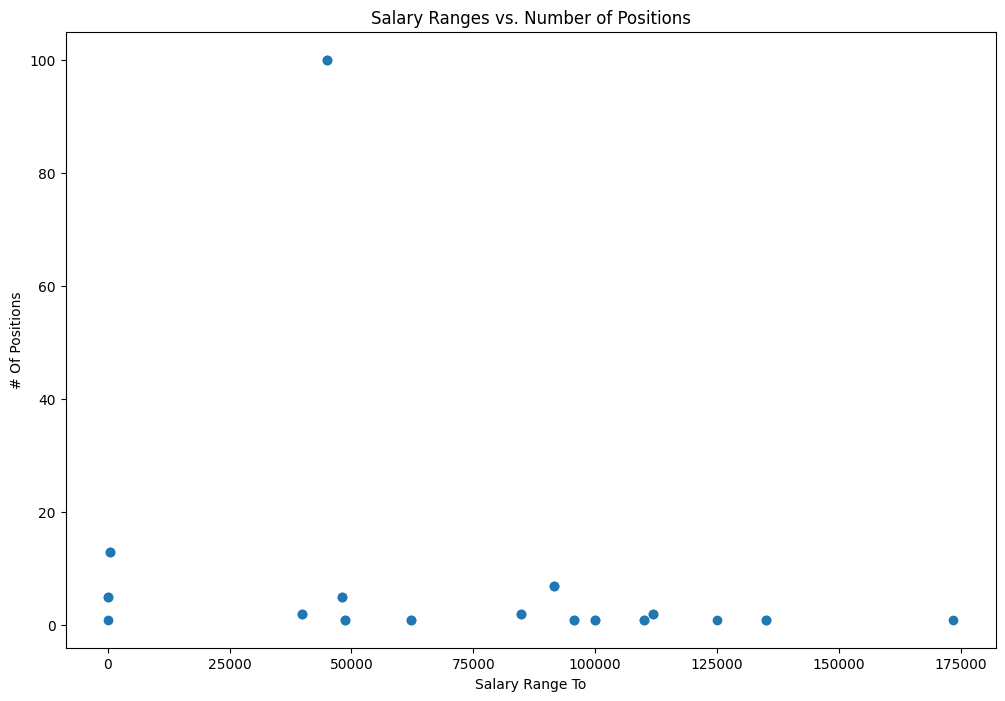

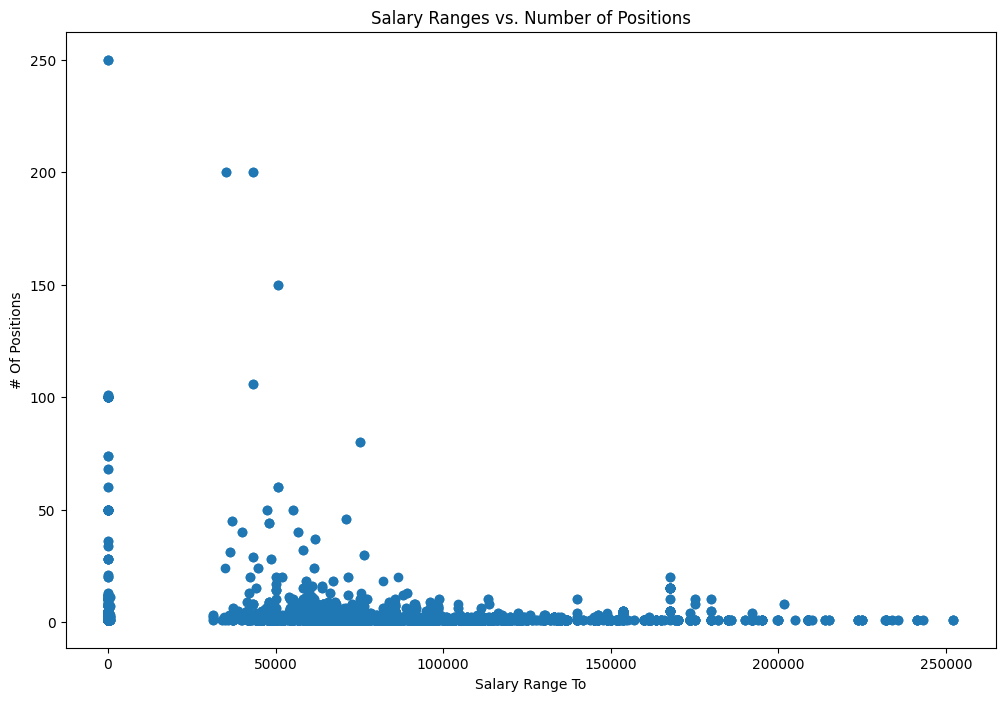

In [40]:
for df in data:
    plt.figure(figsize=(12,8))
    plt.scatter(df['Salary Range To'], df['# Of Positions'])
    plt.xlabel('Salary Range To')
    plt.ylabel('# Of Positions')
    plt.title('Salary Ranges vs. Number of Positions')
    plt.show()


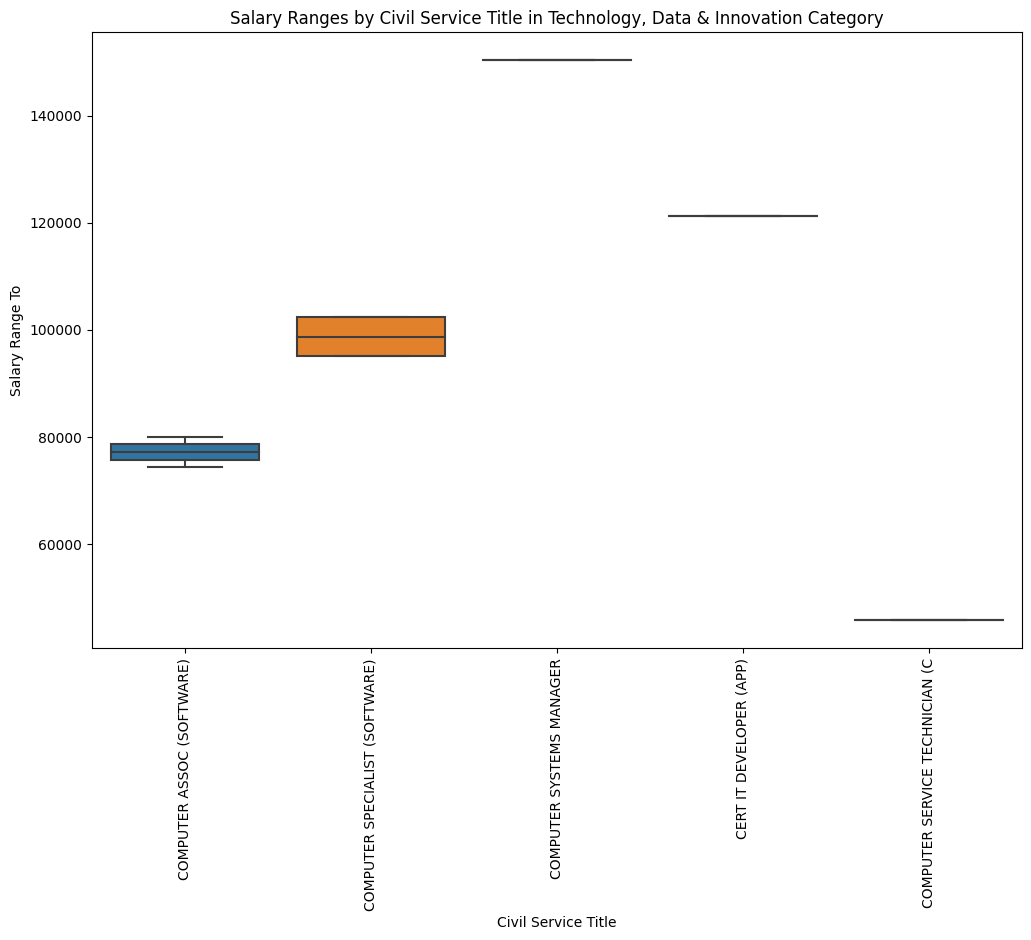

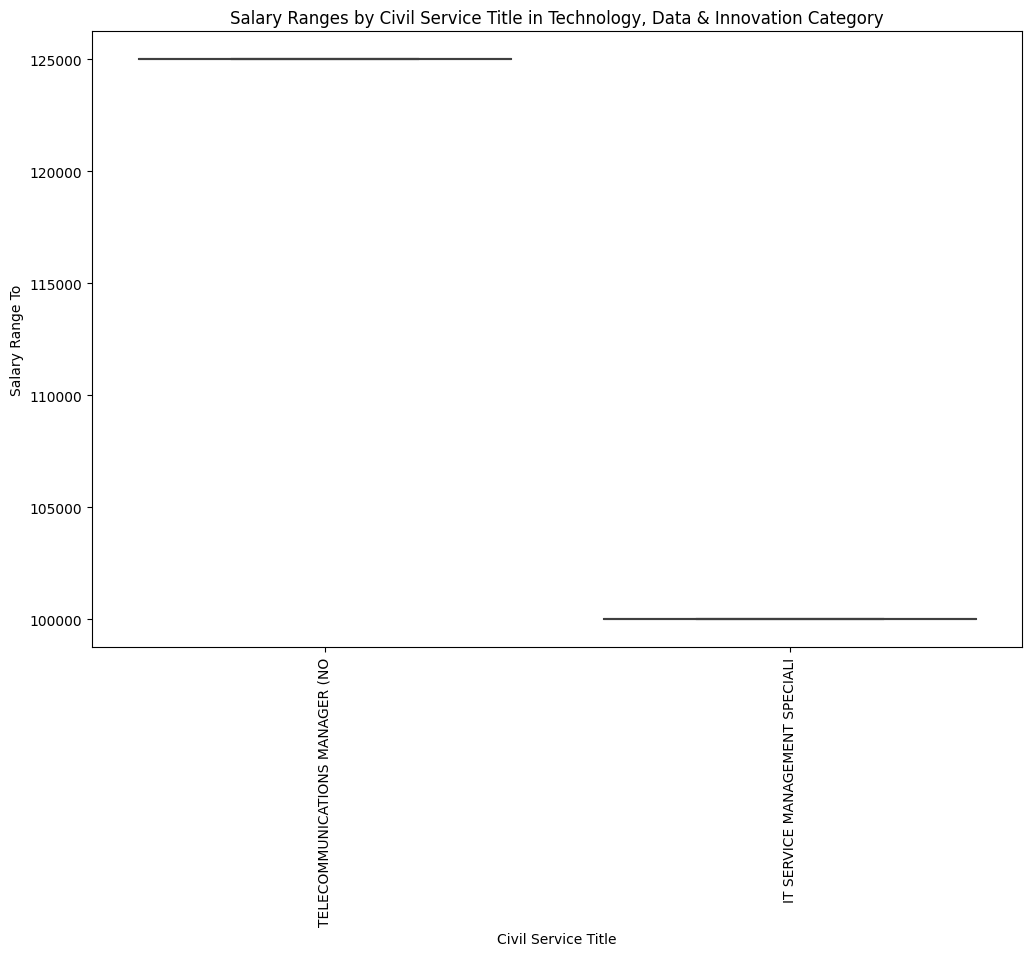

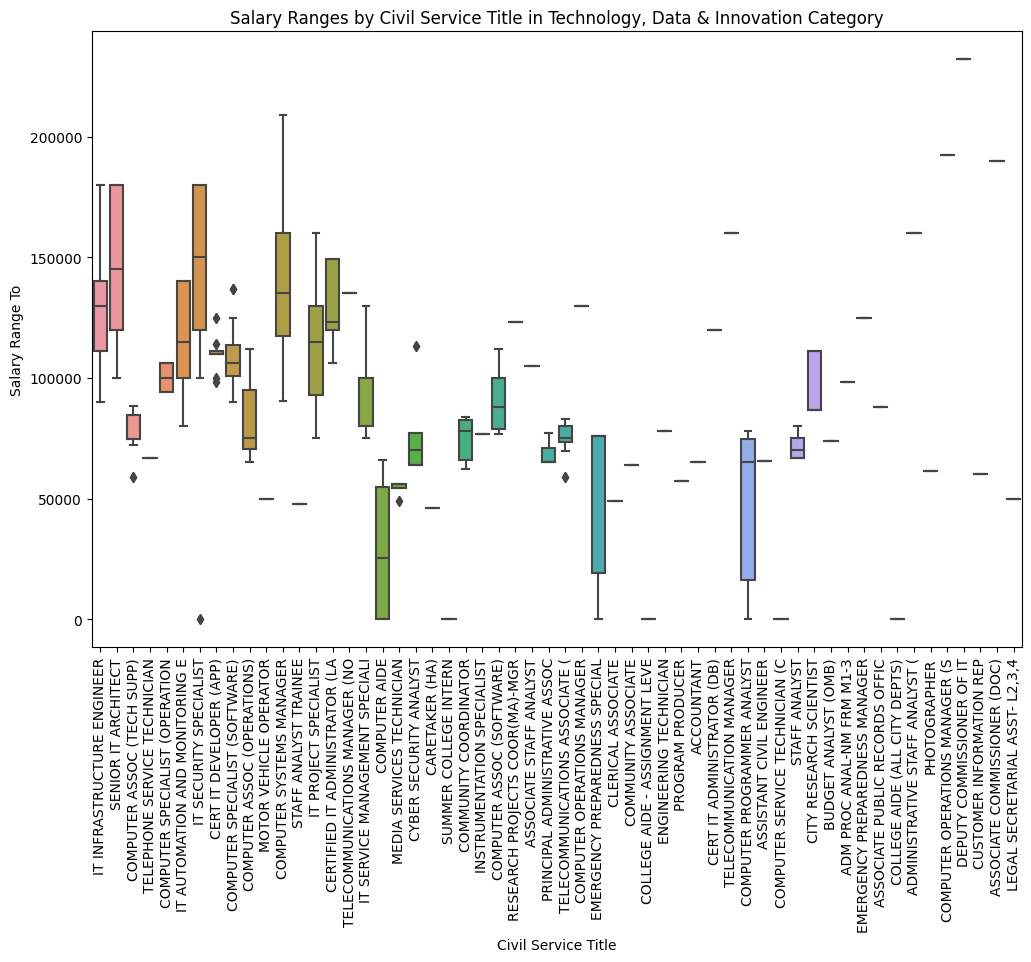

In [41]:
for df in data:
    
    tech_data_df = df[df['Job Category'] == 'Technology, Data & Innovation']

    plt.figure(figsize=(12,8))
    sns.boxplot(x='Civil Service Title', y='Salary Range To', data=tech_data_df)
    plt.xticks(rotation=90)
    plt.xlabel('Civil Service Title')
    plt.ylabel('Salary Range To')
    plt.title('Salary Ranges by Civil Service Title in Technology, Data & Innovation Category')
    plt.show()


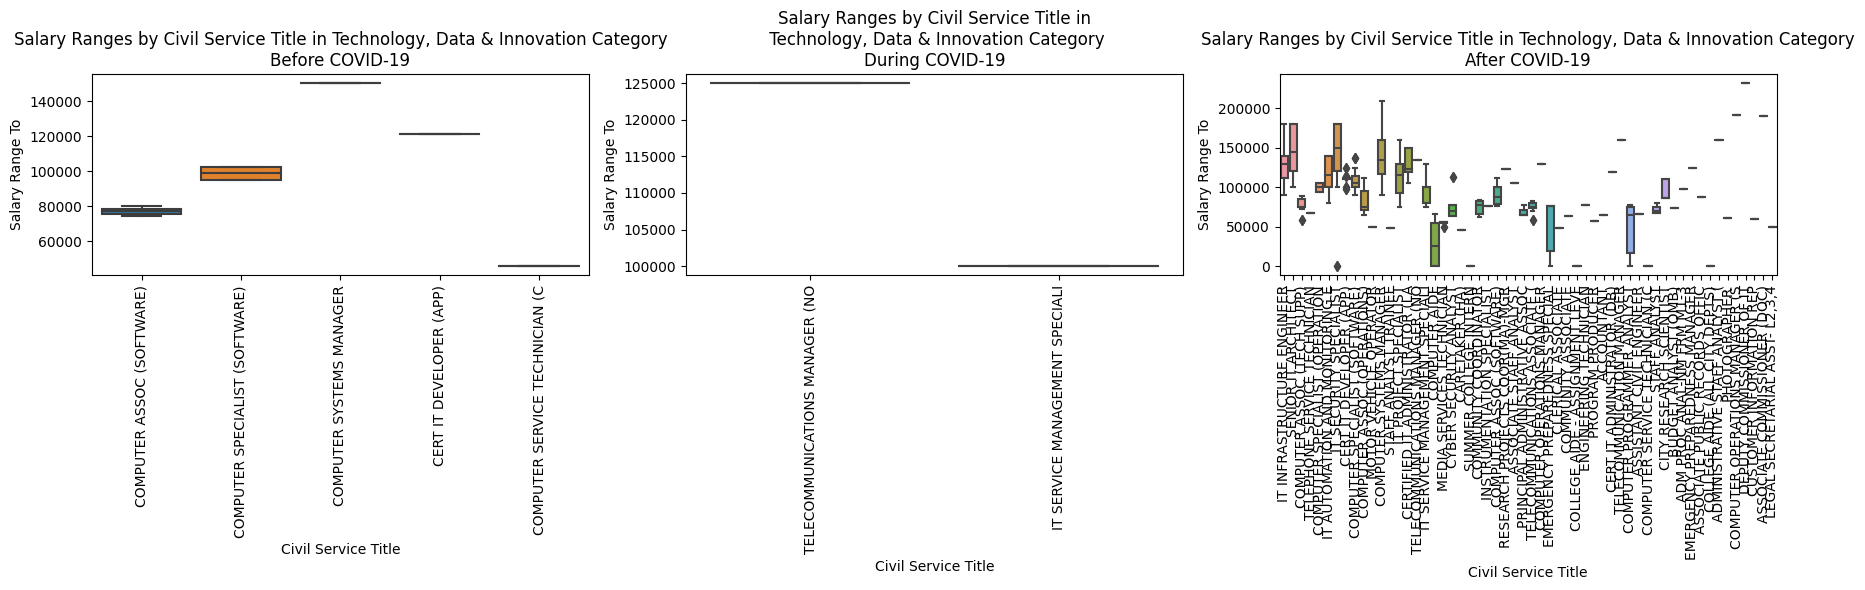

In [43]:
tech_data_before_df = data_before_covid[data_before_covid['Job Category'] == 'Technology, Data & Innovation']
tech_data_during_df = data_during_covid[data_during_covid['Job Category'] == 'Technology, Data & Innovation']
tech_data_after_df = data_after_covid[data_after_covid['Job Category'] == 'Technology, Data & Innovation']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

sns.boxplot(x='Civil Service Title', y='Salary Range To', data=tech_data_before_df, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_xlabel('Civil Service Title')
axes[0].set_ylabel('Salary Range To')
axes[0].set_title('Salary Ranges by Civil Service Title in Technology, Data & Innovation Category\nBefore COVID-19')

sns.boxplot(x='Civil Service Title', y='Salary Range To', data=tech_data_during_df, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_xlabel('Civil Service Title')
axes[1].set_ylabel('Salary Range To')
axes[1].set_title('Salary Ranges by Civil Service Title in\n Technology, Data & Innovation Category\nDuring COVID-19')

sns.boxplot(x='Civil Service Title', y='Salary Range To', data=tech_data_after_df, ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
axes[2].set_xlabel('Civil Service Title')
axes[2].set_ylabel('Salary Range To')
axes[2].set_title('Salary Ranges by Civil Service Title in Technology, Data & Innovation Category\nAfter COVID-19')

plt.tight_layout()
plt.show()
